In [1]:
import pandas as pd

df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

In [2]:
# df_hour.head(30)
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df_hour["datetime"] = pd.to_datetime(df_hour["dteday"]) + pd.to_timedelta(df_hour["hr"], unit="h")
df_hour.set_index("datetime", inplace=True)

In [5]:
from scipy.stats import pearsonr

# Calculate correlation and p-value
r, p_value = pearsonr(df_hour['casual'], df_hour['cnt'])

# Set your significance level
alpha = 0.05

# Print a clear summary
print(f"Pearson correlation coefficient: {r:.3f}")
print(f"P-value: {p_value:.3e}")  # scientific notation if very small

if p_value < alpha:
    print(f"The correlation is statistically significant at alpha = {alpha}.")
else:
    print(f"The correlation is NOT statistically significant at alpha = {alpha}.")


Pearson correlation coefficient: 0.695
P-value: 0.000e+00
The correlation is statistically significant at alpha = 0.05.


In [6]:
df_hour.index.is_monotonic_increasing


True

In [7]:
df_hour.index.duplicated().sum()


np.int64(0)

In [8]:
df_hour.index.is_unique


True

# Plots

<Axes: xlabel='datetime'>

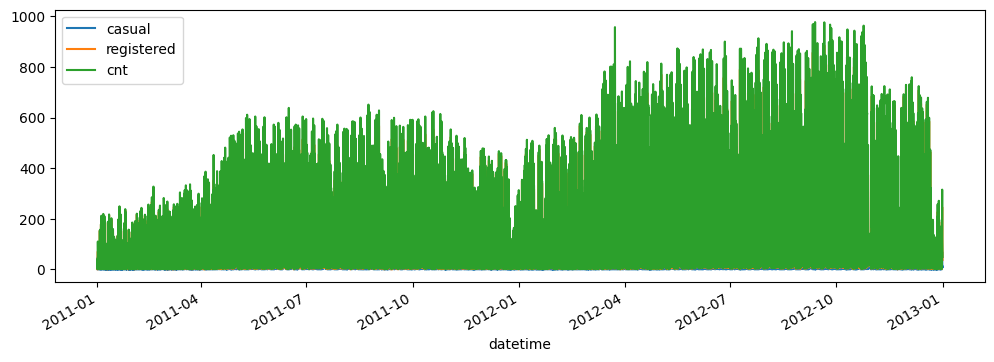

In [11]:
import matplotlib.pyplot as plt

df_hour[["casual","registered","cnt"]].plot(figsize=(12,4))


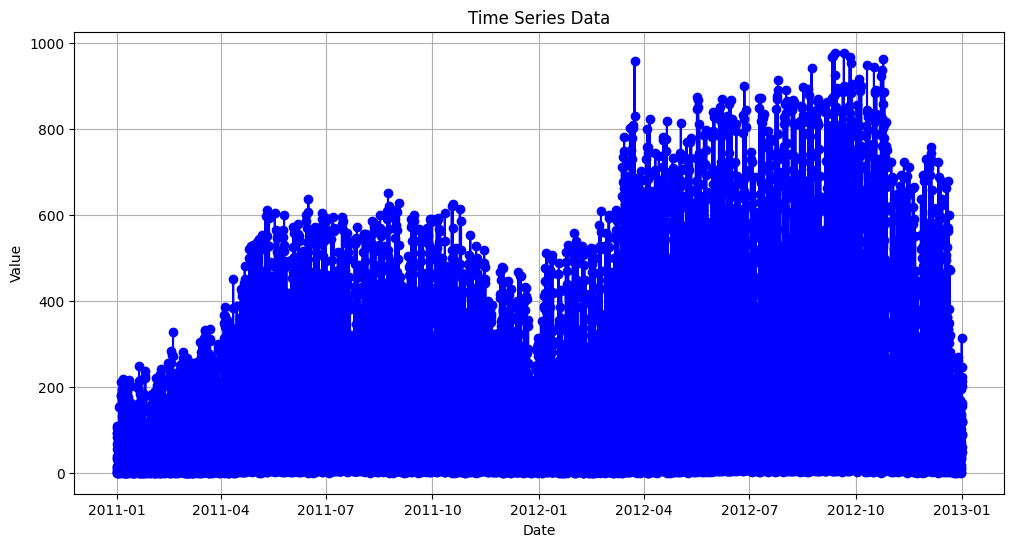

In [ ]:
# Plotting the time series data
plt.figure(figsize=(12, 6))
plt.plot(df_hour.index, df_hour['cnt'], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')


# Show the plot
plt.grid(True)
plt.show()

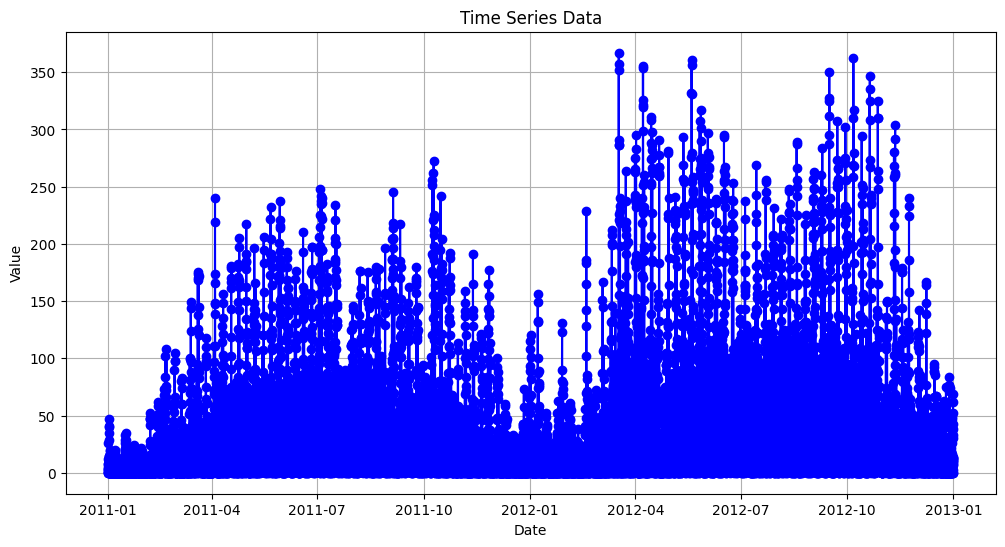

In [ ]:
# Plotting the time series data
plt.figure(figsize=(12, 6))
plt.plot(df_hour.index, df_hour['casual'], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')


# Show the plot
plt.grid(True)
plt.show()

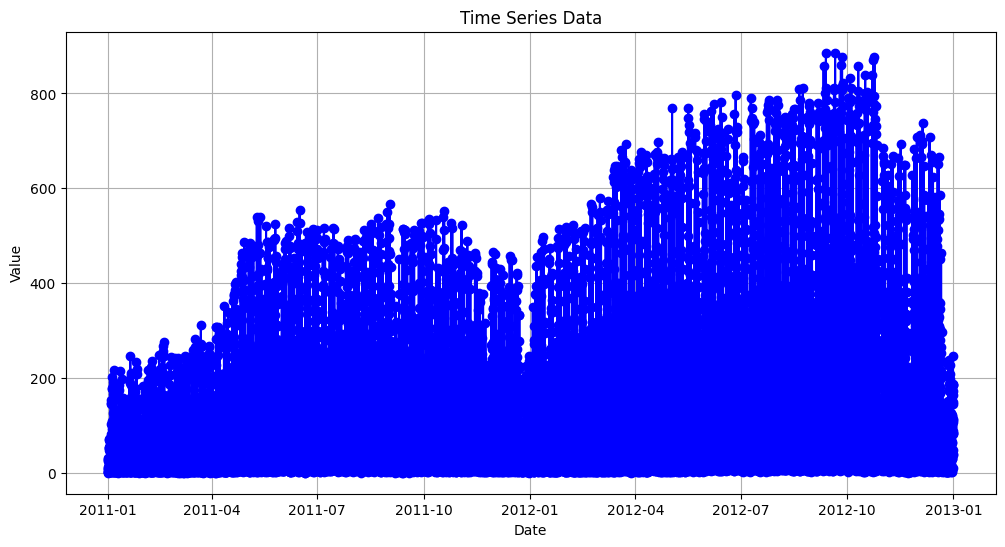

In [ ]:
# Plotting the time series data
plt.figure(figsize=(12, 6))
plt.plot(df_hour.index, df_hour['registered'], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')


# Show the plot
plt.grid(True)
plt.show()

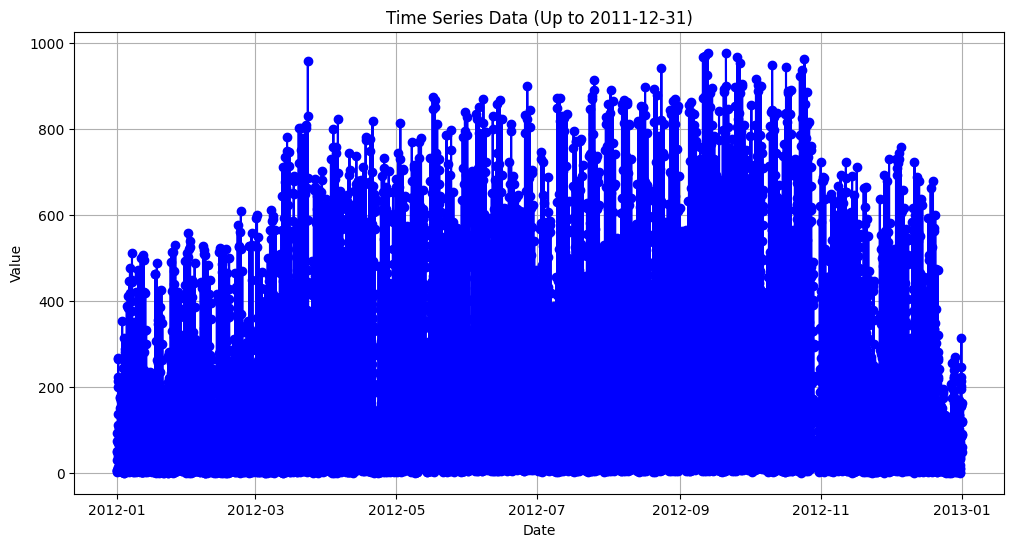

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the data up to 2011-12-31
df_plot = df_hour[df_hour.index >= '2011-12-31 23:00:00']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_plot.index, df_plot['cnt'], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Time Series Data (Up to 2011-12-31)')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.grid(True)
plt.show()


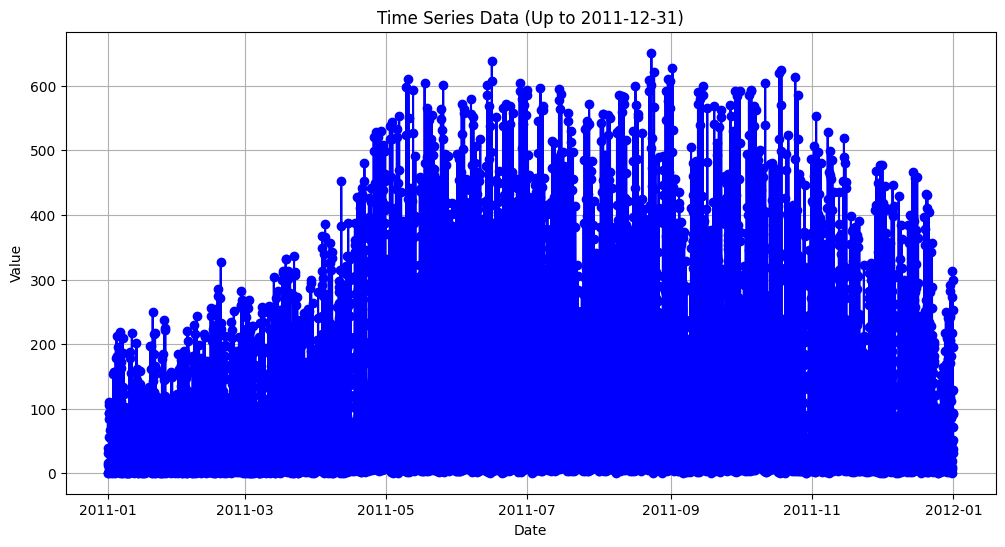

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the data up to 2011-12-31
df_plot = df_hour[df_hour.index <= '2011-12-31 23:00:00']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_plot.index, df_plot['cnt'], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Time Series Data (Up to 2011-12-31)')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.grid(True)
plt.show()


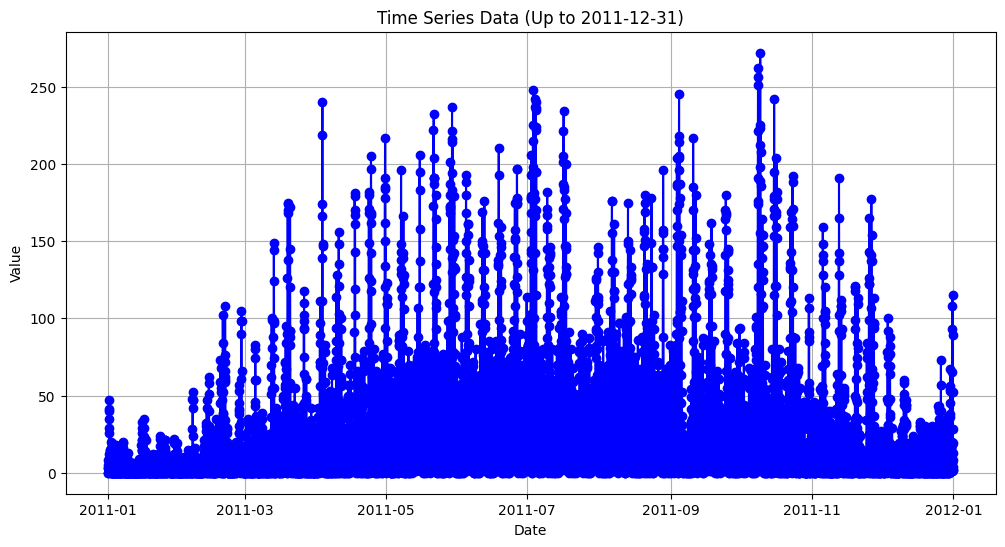

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the data up to 2011-12-31
df_plot = df_hour[df_hour.index <= '2011-12-31 23:00:00']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_plot.index, df_plot['casual'], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Time Series Data (Up to 2011-12-31)')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.grid(True)
plt.show()


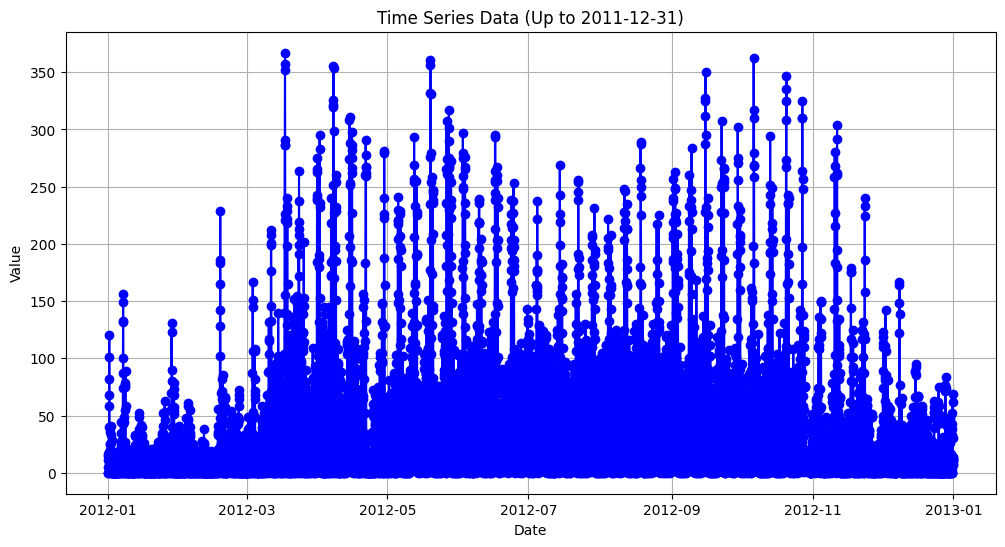

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the data up to 2011-12-31
df_plot = df_hour[df_hour.index > '2011-12-31 23:00:00']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_plot.index, df_plot['casual'], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Time Series Data (Up to 2011-12-31)')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.grid(True)
plt.show()


Overall increase in casual and registered in the year 2012

# Seasonality Check

Text(0.5, 1.0, 'Average Casual and Registered Users by Hour of Day')

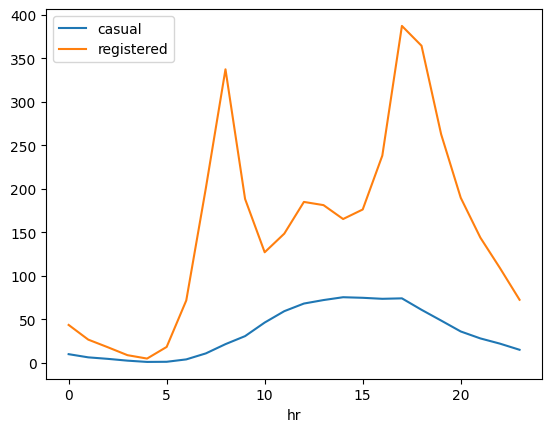

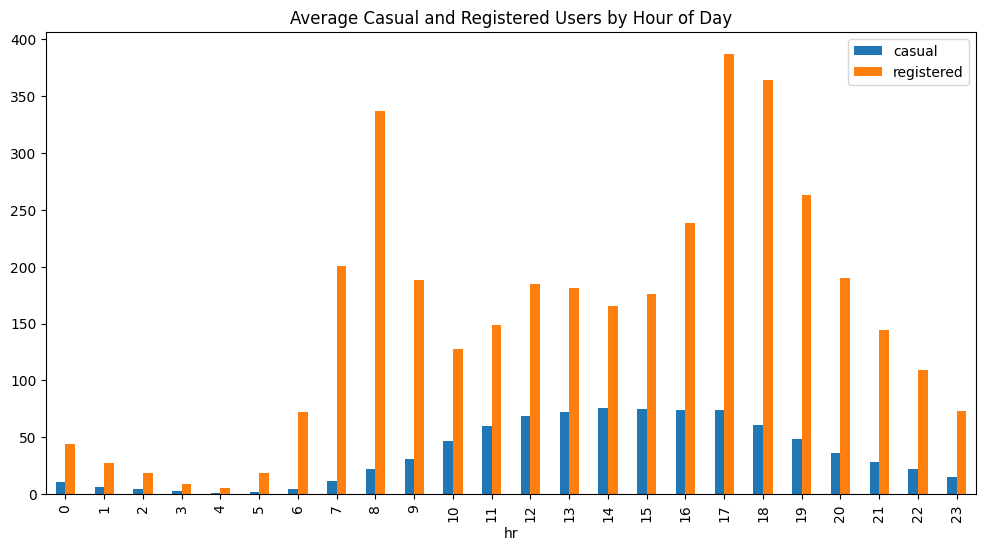

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

#df.groupby("hr")[["casual","registered"]].mean().plot()
df_hour.groupby("hr")[["casual","registered"]].mean().plot()
df_hour.groupby("hr")[["casual","registered"]].mean().plot(kind='bar', figsize=(12, 6))
plt.title('Average Casual and Registered Users by Hour of Day')

<Axes: xlabel='hr'>

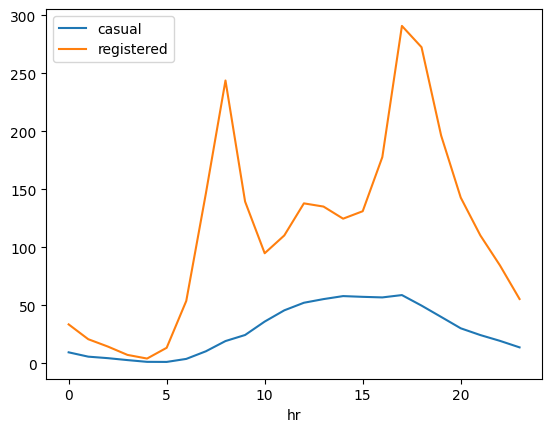

In [20]:
df_plot_1 = df_hour[df_hour.index <= '2011-12-31 23:00:00']
df_plot_1.groupby("hr")[["casual","registered"]].mean().plot()

<Axes: xlabel='weekday'>

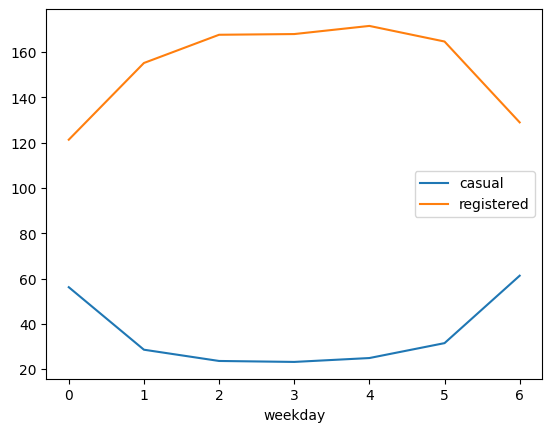

In [22]:
df_hour.groupby("weekday")[["casual","registered"]].mean().plot()


<Axes: xlabel='mnth'>

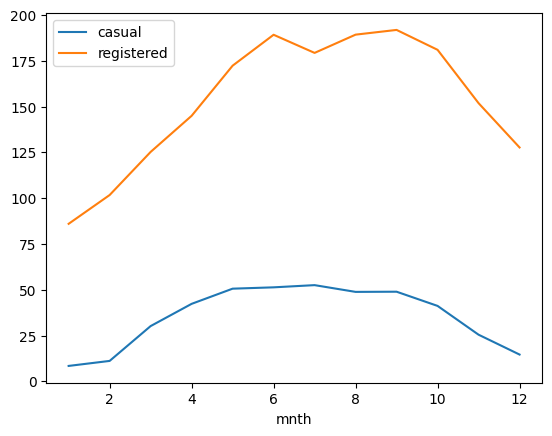

In [23]:
#df.groupby("mnth")[["casual","registered"]].mean().plot()
df_hour.groupby("mnth")[["casual","registered"]].mean().plot()

<Axes: xlabel='mnth'>

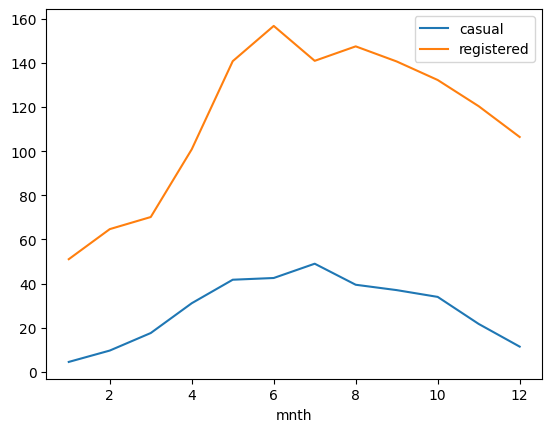

In [25]:

df_plot_4 = df_hour[df_hour.index <= '2011-12-31 23:00:00']
df_plot_4.groupby("mnth")[["casual","registered"]].mean().plot()

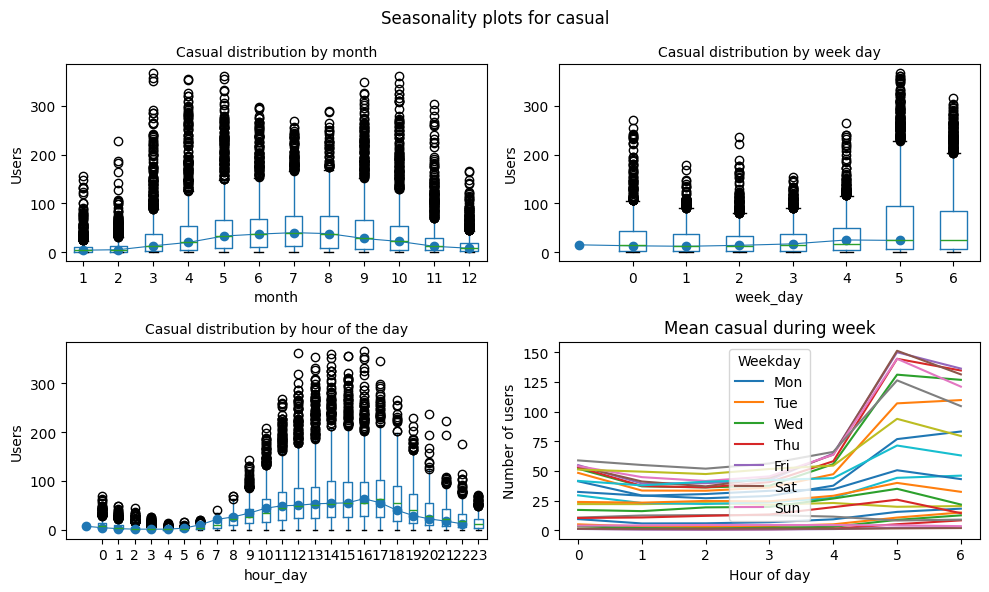

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume df is your hourly bike-sharing dataframe with datetime index
# and columns 'casual', 'registered', 'cnt'

data = df_hour.copy()
data['month'] = data.index.month
data['week_day'] = data.index.dayofweek  # 0=Mon
data['hour_day'] = data.index.hour       # 0-23

# We'll do plots for 'casual' first (repeat for 'registered')
target = 'casual'

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs = axs.ravel()

# 1️⃣ Users distribution by month
data.boxplot(column=target, by='month', ax=axs[0])
data.groupby('month')[target].median().plot(style='o-', linewidth=0.8, ax=axs[0])
axs[0].set_ylabel('Users')
axs[0].set_title(f'{target.capitalize()} distribution by month', fontsize=10)

# 2️⃣ Users distribution by weekday
data.boxplot(column=target, by='week_day', ax=axs[1])
data.groupby('week_day')[target].median().plot(style='o-', linewidth=0.8, ax=axs[1])
axs[1].set_ylabel('Users')
axs[1].set_title(f'{target.capitalize()} distribution by week day', fontsize=10)

# 3️⃣ Users distribution by hour of the day
data.boxplot(column=target, by='hour_day', ax=axs[2])
data.groupby('hour_day')[target].median().plot(style='o-', linewidth=0.8, ax=axs[2])
axs[2].set_ylabel('Users')
axs[2].set_title(f'{target.capitalize()} distribution by hour of the day', fontsize=10)

# 4️⃣ Mean users by week day and hour
mean_day_hour = data.groupby(["week_day", "hour_day"])[target].mean().unstack()
mean_day_hour.plot(ax=axs[3])
axs[3].set_title(f"Mean {target} during week")
axs[3].set_xlabel("Hour of day")
axs[3].set_ylabel("Number of users")
axs[3].legend(title='Weekday', labels=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])

fig.suptitle(f"Seasonality plots for {target}", fontsize=12)
fig.tight_layout()
plt.show()


array([[<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'cnt'}>, <Axes: >]], dtype=object)

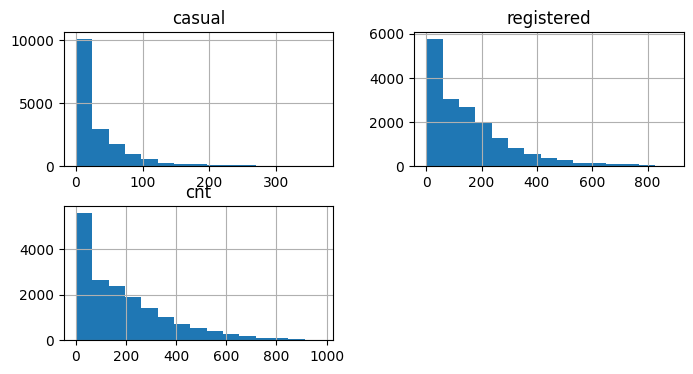

In [27]:
df_hour[["casual","registered","cnt"]].hist(bins=15, figsize=(8,4))


In [28]:
# df[["casual","registered"]].skew()
df_hour[["casual","registered"]].skew()

casual        2.499237
registered    1.557904
dtype: float64

In [31]:

# df_hour.corr()["casual"].sort_values(ascending=False)
# df_hour.corr()["registered"].sort_values(ascending=False)

numeric_cols = df_hour.select_dtypes(include='number')
numeric_cols.corr()["casual"].sort_values(ascending=False)


casual        1.000000
cnt           0.694564
registered    0.506618
temp          0.459616
atemp         0.454080
hr            0.301202
instant       0.158295
yr            0.142779
season        0.120206
windspeed     0.090287
mnth          0.068457
weekday       0.032721
holiday       0.031564
weathersit   -0.152628
workingday   -0.300942
hum          -0.347028
Name: casual, dtype: float64

In [32]:
numeric_cols.corr()["registered"].sort_values(ascending=False)


registered    1.000000
cnt           0.972151
casual        0.506618
hr            0.374141
temp          0.335361
atemp         0.332559
instant       0.282046
yr            0.253684
season        0.174226
workingday    0.134326
mnth          0.122273
windspeed     0.082321
weekday       0.021578
holiday      -0.047345
weathersit   -0.120966
hum          -0.273933
Name: registered, dtype: float64

<Axes: xlabel='weathersit', ylabel='casual'>

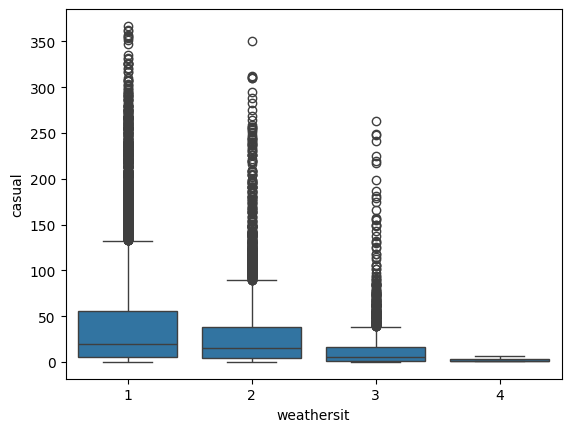

In [35]:
sns.boxplot(x="weathersit", y="casual", data=df_hour)

<Axes: xlabel='weathersit', ylabel='registered'>

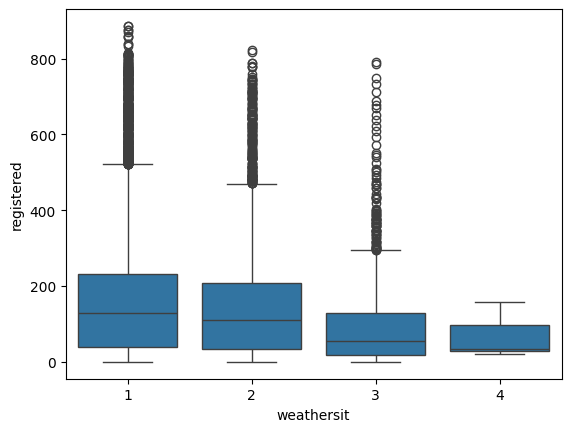

In [36]:

sns.boxplot(x="weathersit", y="registered", data=df_hour)

# Lag

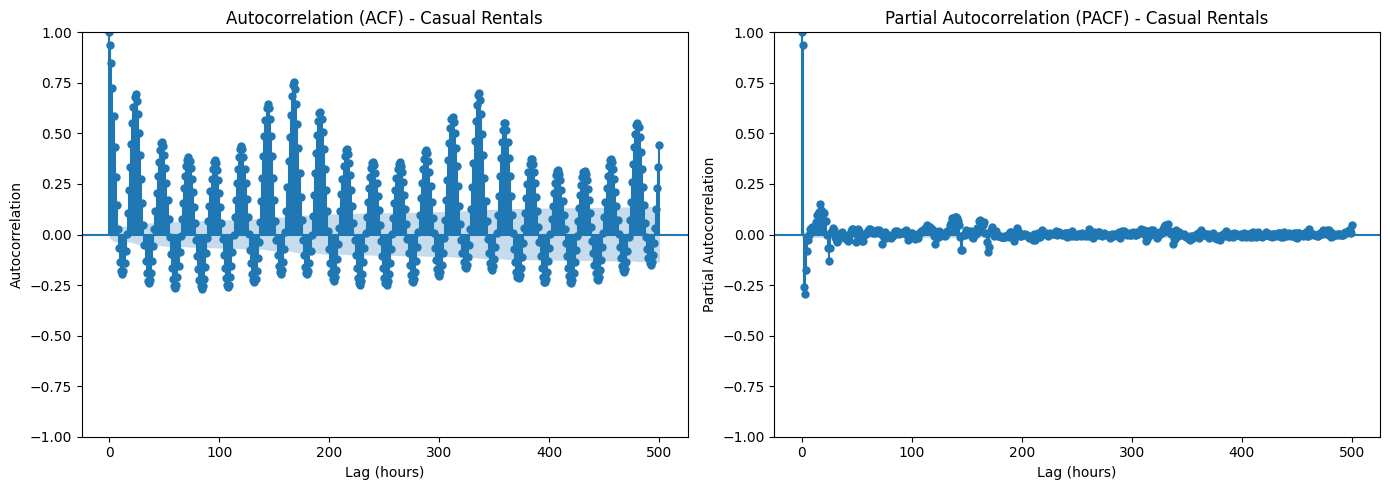

In [39]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Autocorrelation Function (ACF)
plot_acf(df_hour["casual"], lags=500, ax=axes[0])
axes[0].set_title("Autocorrelation (ACF) - Casual Rentals")
axes[0].set_xlabel("Lag (hours)")
axes[0].set_ylabel("Autocorrelation")

# Partial Autocorrelation Function (PACF)
plot_pacf(df_hour["casual"], lags=500, ax=axes[1], method="ywm")
axes[1].set_title("Partial Autocorrelation (PACF) - Casual Rentals")
axes[1].set_xlabel("Lag (hours)")
axes[1].set_ylabel("Partial Autocorrelation")

plt.tight_layout()
plt.show()


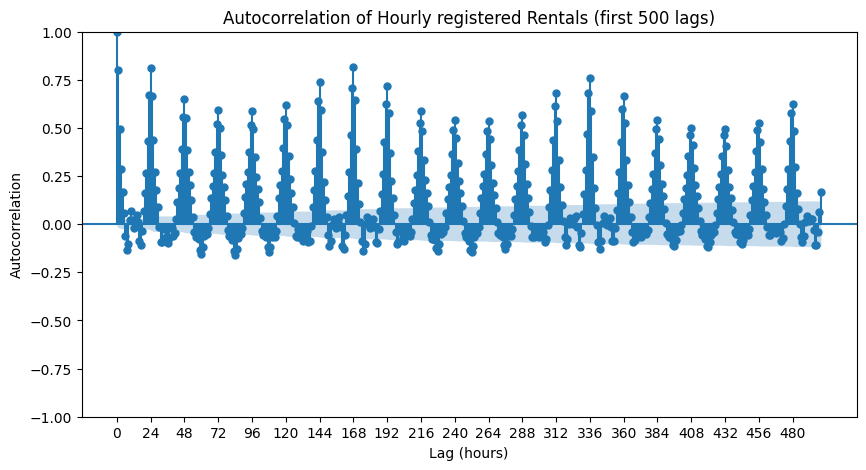

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf

# Plot autocorrelation for first 500 lags
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df_hour["registered"], lags=500, ax=ax)

# Set x-axis ticks at every 24 hours
ticks = np.arange(0, 501, 24)  # from 0 to 500, step 24
ax.set_xticks(ticks)

# Labels
ax.set_xlabel("Lag (hours)")
ax.set_ylabel("Autocorrelation")
ax.set_title("Autocorrelation of Hourly registered Rentals (first 500 lags)")

plt.show()


# Feature Engineering

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Example: test 'casual' series
series = df_hour['casual']

adf_result = adfuller(series)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

if adf_result[1] < 0.05:
    print("Series is likely stationary.")
else:
    print("Series is likely non-stationary.")


ADF Statistic: -13.667510462615013
p-value: 1.4810353782022105e-25
Critical Values: {'1%': np.float64(-3.430727308679485), '5%': np.float64(-2.861706755762842), '10%': np.float64(-2.566858759781439)}
Series is likely stationary.


In [46]:
# Example: 2h, 4h, 8h, 24h lags
lag_hours = [2, 4, 8, 24]

for lag in lag_hours:
    df_hour[f'casual_lag{lag}'] = df_hour['casual'].shift(lag)
    df_hour[f'reg_lag{lag}'] = df_hour['registered'].shift(lag)


In [47]:
# rolling mean over past 3h and 24h
from curses import window

df_hour['casual_roll3'] = df_hour['casual'].shift(1).rolling(window=3).mean()
df_hour['registered_roll3'] = df_hour['registered'].shift(1).rolling(window=3).mean()

In [48]:
df_hour['casual_roll24'] = df_hour['casual'].shift(1).rolling(window=24).mean()
df_hour['registered_roll24'] = df_hour['registered'].shift(1).rolling(window=24).mean()


In [ ]:
# --- 4️⃣ Cyclical time features ---
df_hour['hr_sin'] = np.sin(2 * np.pi * df_hour['hr']/24)
df_hour['hr_cos'] = np.cos(2 * np.pi * df_hour['hr']/24)
df_hour['month_sin'] = np.sin(2 * np.pi * df_hour['mnth']/12)
df_hour['month_cos'] = np.cos(2 * np.pi * df_hour['mnth']/12)
df_hour['weekday_sin'] = np.sin(2 * np.pi * df_hour['weekday']/7)
df_hour['weekday_cos'] = np.cos(2 * np.pi * df_hour['weekday']/7)

In [ ]:
# --- 5️⃣ Other features ---
feature_cols = [
    'temp', 'atemp', 'hum', 'windspeed', 'holiday', 'workingday',
    'hr_sin', 'hr_cos', 'month_sin', 'month_cos', 'weekday_sin', 'weekday_cos',
    'casual_lag2','casual_lag4','casual_lag8','casual_lag24','casual_roll3','casual_roll24',
    'reg_lag2','reg_lag4','reg_lag8','reg_lag24','registered_roll3','registered_roll24'
]

# Drop rows with NaN (due to lags/rolling)
df_model = df_hour.dropna(subset=feature_cols + ['casual','registered'])


In [51]:
# --- 6️⃣ Separate targets ---
X = df_model[feature_cols]
y_casual = df_model['casual']
y_registered = df_model['registered']

In [52]:
# --- 7️⃣ Train/test split (80/20) ---
import numpy as np
from sklearn.model_selection import train_test_split

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_casual, test_size=0.2, shuffle=False)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_registered, test_size=0.2, shuffle=False)


# Model Training

In [53]:
import lightgbm as lgb

# --- 8️⃣ Train LightGBM models ---
lgb_params = {
    'n_estimators': 500,
    'learning_rate': 0.05,
    'num_leaves': 31
}

In [ ]:
    from sklearn.metrics import mean_absolute_error

    # Casual model
    model_casual = lgb.LGBMRegressor(**lgb_params)
    model_casual.fit(X_train_c, y_train_c)
    y_pred_c = model_casual.predict(X_test_c)
    mae_c = mean_absolute_error(y_test_c, y_pred_c)
    print("Casual MAE:", mae_c)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3362
[LightGBM] [Info] Number of data points in the train set: 13884, number of used features: 24
[LightGBM] [Info] Start training from score 34.091760
Casual MAE: 8.621917288389573


In [55]:
# Registered model
model_registered = lgb.LGBMRegressor(**lgb_params)
model_registered.fit(X_train_r, y_train_r)
y_pred_r = model_registered.predict(X_test_r)
mae_r = mean_absolute_error(y_test_r, y_pred_r)
print("Registered MAE:", mae_r)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000700 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3362
[LightGBM] [Info] Number of data points in the train set: 13884, number of used features: 24
[LightGBM] [Info] Start training from score 140.826923
Registered MAE: 31.002521276075626


In [37]:
# Registered model
model_registered = lgb.LGBMRegressor(**lgb_params)
model_registered.fit(X_train_r + X_train_c, y_train_r + y_train_c)
y_pred_r = model_registered.predict(X_test_r + X_test_c)
mae_r = mean_absolute_error(y_test_r + y_test_c, y_pred_r + y_pred_c)
print("Registered MAE:", mae_r)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3362
[LightGBM] [Info] Number of data points in the train set: 13884, number of used features: 24
[LightGBM] [Info] Start training from score 174.918683
Registered MAE: 47.00824849026236


In [38]:
# --- 9️⃣ Optional: combined total ---
y_pred_total = y_pred_c + y_pred_r
y_total = y_test_c + y_test_r
mae_total = mean_absolute_error(y_total, y_pred_total)
print("Total MAE:", mae_total)

Total MAE: 47.00824849026236


In [ ]:
df_hour[df_hour["dteday"]=="2011-01-08"]

# walk-forward expanding-window cross-validation

In [56]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [58]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Create numeric features from the date
df_hour['day'] = df_hour['dteday'].dt.day
df_hour['month'] = df_hour['dteday'].dt.month
df_hour['year'] = df_hour['dteday'].dt.year
df_hour['weekday'] = df_hour['dteday'].dt.weekday
df_hour['hour'] = df_hour['hr']  # hr is already in dataset

In [60]:
# --- 5️⃣ Other features ---
feature_cols = [
    'temp', 'atemp', 'hum', 'windspeed', 'holiday', 'workingday',
    'hr_sin', 'hr_cos', 'month_sin', 'month_cos', 'weekday_sin', 'weekday_cos',
    'casual_lag2','casual_lag4','casual_lag8','casual_lag24','casual_roll3','casual_roll24',
    'reg_lag2','reg_lag4','reg_lag8','reg_lag24','registered_roll3','registered_roll24'
]

# Drop rows with NaN (due to lags/rolling)
df_model = df_hour.dropna(subset=feature_cols + ['casual','registered'])


In [61]:
# Example setup
target = 'casual'  # or 'registered'

features = feature_cols
# features = ['instant',  'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
#        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']  # replace with your features

In [62]:

import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
from lightgbm import LGBMRegressor


In [63]:
# Parameters
n_splits = 5  # number of folds

# Define RMSE scorer
# Define MAE scorer
def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

mae_scorer = make_scorer(mae, greater_is_better=False)

# TimeSeriesSplit with expanding window
tscv = TimeSeriesSplit(n_splits=n_splits)

X = df_model[features]
y = df_model['casual']

mae_scores = []


In [ ]:
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = LGBMRegressor(
        objective='regression',
        n_estimators=100,
        verbosity=-1
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae_fold = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae_fold)


In [65]:
print("Expanding window MAEs:", mae_scores)
print("Mean MAE:", np.mean(mae_scores))

Expanding window MAEs: [11.316808970687203, 6.728314065210212, 8.652336960717426, 11.635392736809843, 8.495591210690987]
Mean MAE: 9.365688788823133


In [66]:
# Parameters
n_splits = 5  # number of folds

# Define RMSE scorer
# Define MAE scorer
def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

mae_scorer = make_scorer(mae, greater_is_better=False)

# TimeSeriesSplit with expanding window
tscv = TimeSeriesSplit(n_splits=n_splits)

X = df_model[features]
y = df_model['registered']

mae_scores = []


In [ ]:


for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = LGBMRegressor(
        objective='regression',
        n_estimators=100,
        verbosity=-1
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae_fold = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae_fold)


In [68]:
print("Expanding window MAEs:", mae_scores)
print("Mean MAE:", np.mean(mae_scores))

Expanding window MAEs: [31.490885770712993, 27.22651377570363, 33.78515100797803, 36.955433068480254, 32.45802742382779]
Mean MAE: 32.38320220934054


In [ ]:
# Parameters
n_splits = 5  # number of folds

# Define RMSE scorer
# Define MAE scorer
def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

mae_scorer = make_scorer(mae, greater_is_better=False)

# TimeSeriesSplit with expanding window
tscv = TimeSeriesSplit(n_splits=n_splits)

X = df_model[features]
y = df_model['registered'] + df_model['casual']

mae_scores = []


for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = LGBMRegressor(
        objective='regression',
        n_estimators=100,
        verbosity=-1
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae_fold = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae_fold)



In [70]:
print("Expanding window MAEs:", mae_scores)
print("Mean MAE:", np.mean(mae_scores))

Expanding window MAEs: [33.383040987576386, 31.45935650119164, 40.17167045356909, 45.01669415730131, 36.6035347288993]
Mean MAE: 37.32685936570754
